In [5]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [6]:
creel_path = "Michigan_Creel_Data_Harvest1.csv"
creel = pd.read_csv(creel_path)
creel.head()


,OBJECTID,PK,Mode,Site,Year,Month,Species,Effort,AnglerTrips,Harvest,Catch,Catch Rate,Total Catch,County,Lake,Port
0,10021,665475,BOAT,1,2012,3,ATL,1823.250000,405.166667,0.0,0.0,0,0.00,MENOMINEE,MI,MENOMINEE
1,10022,665476,BOAT,1,2012,4,ATL,5103.000000,1173.326897,0.0,0.0,0,0.00,MENOMINEE,MI,MENOMINEE
2,10023,665477,BOAT,1,2012,5,ATL,1693.777778,386.728827,0.0,0.0,0,0.00,MENOMINEE,MI,MENOMINEE
3,10024,665478,BOAT,1,2012,6,ATL,4304.250000,810.838418,0.0,0.0,0,0.00,MENOMINEE,MI,MENOMINEE
4,10025,665479,BOAT,1,2012,7,ATL,15058.444600,1679.648130,0.0,0.0,0,0.00,MENOMINEE,MI,MENOMINEE


In [7]:
stock_path = "Fish_Stocking_Data.csv"
stock = pd.read_csv(stock_path)
stock.head()

,County,Water Body,Site Name,Town,Range,Section,Species,Strain,Date,Number,Avg. Length
0,Alcona,Alcona Dam Pond COUNTY PARK (25N 05E 11),COUNTY PARK,25N,05E,11.0,Walleye,Muskegon,2013,29306,2.10
1,Alcona,Alcona Dam Pond COUNTY PARK (25N 05E 11),COUNTY PARK,25N,05E,11.0,Walleye,Muskegon,2015,27537,1.50
2,Alcona,Au Sable River - Mio to Alcona reach FR4842-Al...,FR4842-Alcona Rest,26N,05E,19.0,Brown trout,Sturgeon River,2016,6000,4.58
3,Alcona,Au Sable River - Mio to Alcona reach FR4842-Al...,FR4842-Alcona Rest,26N,05E,19.0,Brown trout,Sturgeon River,2017,6000,4.87
4,Alcona,Au Sable River - Mio to Alcona reach FR4842-Al...,FR4842-Alcona Rest,26N,05E,19.0,Brown trout,Sturgeon River,2018,6000,5.24


In [10]:
#Find the total and mean catch of walleye and perch in Chippewa County from 2012 - 2022
#Make a data frame of these data 
rain_chip_total = creel.loc[(creel["Species"] == "RBT") &
                           (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
rain_chip_mean = creel.loc[(creel["Species"] == "RBT") &
                          (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
rain_chip_median = creel.loc[(creel["Species"] == "RBT") &
                            (creel["County"]== "CHIPPEWA")].groupby('Year').median()
rain_chip_sd = creel.loc[(creel["Species"] == "RBT") &
                        (creel["County"]== "CHIPPEWA")].groupby('Year').std()
rain_chip_sem = creel.loc[(creel["Species"] == "RBT") &
                         (creel["County"]== "CHIPPEWA")].groupby('Year').sem()
rainchiptot = rain_chip_total['Total Catch']
rainchipm = rain_chip_mean['Total Catch']
rainchipmed = rain_chip_median['Total Catch']
rainchipsd = rain_chip_sd['Total Catch']
rainchipsem = rain_chip_sem['Total Catch']
rain_chip_df = pd.DataFrame({'Total Trout Caught':rainchiptot,
                            'Mean Trout Caught':rainchipm,
                            'Median Trout Caught':rainchipmed,
                            'Trout Caught St. Dev.':rainchipsd,
                            "Trout Caught St. Err.":rainchipsem})
rain_chip_df



/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_2201/3362847169.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_2201/3362847169.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_2201/3362847169.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_

KeyError: 'Total Catch'

In [8]:
test = creel.loc[(creel["Species"] == "RBT") &
                           (creel["County"]== "CHIPPEWA")]
test['Total Catch']

13371       0.00
13372       0.00
13373       0.00
13374       0.00
13375       0.00
           ...  
248011    151.50
248012      0.00
248013      0.00
248014      0.00
248015      0.00
Name: Total Catch, Length: 412, dtype: object

In [44]:
#walchipmean = creel.loc[(creel["Species"] == "WAE") &
                        #(creel['County'] == "CHIPPEWA")].groupby('Year').mean()
wal_chip_total = creel.loc[(creel["Species"] == "WAE") &
                           (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
wal_chip_mean = creel.loc[(creel["Species"] == "WAE") &
                          (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
wal_chip_median = creel.loc[(creel["Species"] == "WAE") &
                            (creel["County"]== "CHIPPEWA")].groupby('Year').median()
wal_chip_sd = creel.loc[(creel["Species"] == "WAE") &
                        (creel["County"]== "CHIPPEWA")].groupby('Year').std()
wal_chip_sem = creel.loc[(creel["Species"] == "WAE") &
                         (creel["County"]== "CHIPPEWA")].groupby('Year').sem()
walchiptot = wal_chip_total['Total Catch']
walchipm = wal_chip_mean['Total Catch']
walchipmed = wal_chip_median['Total Catch']
walchipsd = wal_chip_sd['Total Catch']
walchipsem = wal_chip_sem['Total Catch']
wal_chip_df = pd.DataFrame({'Total Walleye Caught':walchiptot,
                            'Mean Walleye Caught':walchipm,
                            'Median Walleye Caught':walchipmed,
                            'Walleye Caught St. Dev.':walchipsd,
                            "Walleye Caught St. Err.":walchipsem})
wal_chip_df


/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_1545/2571322507.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_1545/2571322507.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_1545/2571322507.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_

KeyError: 'Total Catch'

In [15]:
#Find the total and mean catch of walleye and perch in Bay County from 2012- 2022
waebay_mean = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').mean(numeric_only=True)
waebay_med = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').median(numeric_only=True)
waebay_sd = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').std(numeric_only=True)
waebay_sem = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').sem(numeric_only=True)
waebay_sum = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')].groupby('Year').sum(numeric_only=True)



waebaymean = waebay_mean['Catch']
waebaymed = waebay_med['Catch']
waebaysum = waebay_sum['Catch']
waebaysd = waebay_sd['Catch']
waebaysem = waebay_sem['Catch']

wae_df = pd.DataFrame({'Total Walleye Caught':waebaysum,'Mean Walleye Caught':waebaymean, 'Median Walleye Caught':waebaymed,
                       'Walleye Catch St. Dev.':waebaysd, "Walleye Catch St. Err.":waebaysem})
wae_df



,Total Walleye Caught,Mean Walleye Caught,Median Walleye Caught,Walleye Catch St. Dev.,Walleye Catch St. Err.
Year,,,,,
2012,24.598626,1.366590,0.0,5.797952,1.366590
2013,0.000000,0.000000,0.0,0.000000,0.000000
2014,0.000000,0.000000,0.0,0.000000,0.000000
2015,39.000000,2.437500,0.0,6.480419,1.620105
2016,18.000000,1.200000,0.0,3.363671,0.868496
2017,78.000000,4.875000,0.0,15.717824,3.929456
2018,0.000000,0.000000,0.0,0.000000,0.000000
2019,48.000000,3.000000,0.0,6.175219,1.543805
2020,0.000000,0.000000,0.0,0.000000,0.000000


In [14]:
rbtbay_mean = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').mean(numeric_only=True)
rbtbay_med = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').median(numeric_only=True)
rbtbay_std = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').std(numeric_only=True)
rbtbay_sem = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').sem(numeric_only=True)
rbtbay_sum = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')].groupby('Year').sum(numeric_only=True)

rbtbaymean = rbtbay_mean['Catch']
rbtbaymed = rbtbay_med['Catch']
rbtbaystd = rbtbay_std['Catch']
rbtbaysem = rbtbay_sem['Catch']
rbtbaysum = rbtbay_sum['Catch']

rbt_df = pd.DataFrame({'Total Trout Caught':rbtbaysum,'Mean Trout Caught':rbtbaymean, 'Median Trout Caught':rbtbaymed,
                       'Trout Catch St. Dev.':rbtbaystd, "Trout Catch St. Err.":rbtbaysem})
rbt_df

,Total Trout Caught,Mean Trout Caught,Median Trout Caught,Trout Catch St. Dev.,Trout Catch St. Err.
Year,,,,,
2012,8519.028428,473.279357,102.932558,770.162197,181.528971
2013,3479.691704,231.979447,112.977186,268.194615,69.247552
2014,5688.225113,379.215008,14.233333,694.738783,179.380782
2015,2019.000000,126.187500,64.500000,170.448905,42.612226
2016,4464.000000,297.600000,56.000000,528.081677,136.350103
2017,1793.000000,112.062500,22.000000,183.077568,45.769392
2018,2000.366527,142.883323,49.919848,173.638386,46.406811
2019,1107.000000,69.187500,5.500000,115.946665,28.986666
2020,1104.323479,55.216174,13.611894,83.906028,18.761958


In [8]:
#Find the total number and measures of central tendancy for Rainbow Trout stocking in Chippewa County
#Make a data summary of the results 
trout_total = stock.loc[(stock["Species"] == "Rainbow trout") & (stock['County']== 'Chippewa')].groupby('Date').sum()
trout_mean = stock.loc[(stock["Species"] == "Rainbow trout") & (stock['County']== 'Chippewa')].groupby('Date').mean() 
trout_median = stock.loc[(stock["Species"] == "Rainbow trout") & (stock["County"]== "Chippewa")].groupby('Date').median()
trout_sd = stock.loc[(stock["Species"] == "Rainbow trout") & (stock["County"]== "Chippewa")].groupby('Date').std()
trout_sem = stock.loc[(stock["Species"] == "Rainbow trout") & (stock["County"]== "Chippewa")].groupby('Date').sem()

trouttot = trout_total['Number']
troutm = trout_mean['Number']
troutmed = trout_median['Number']
troutsd = trout_sd['Number']
troutsem = trout_sem['Number']
trout_df = pd.DataFrame({'Total Trout Stocked':trouttot,'Mean Trout Stocked':troutm, 'Median Trout Stocked':troutmed, 'Trout Stocking St. Dev.':troutsd, "Trout Stocking St. Err.":troutsem})
trout_df



/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_1545/2091519696.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trout_total = stock.loc[(stock["Species"] == "Rainbow trout") & (stock['County']== 'Chippewa')].groupby('Date').sum()
/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_1545/2091519696.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trout_mean = stock.loc[(stock["Species"] == "Rainbow trout") & (stock['County']== 'Chippewa')].groupby('Date').mean()
/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_1545/2091519696.py:5: FutureWarning: The default value of numeric_

,Total Trout Stocked,Mean Trout Stocked,Median Trout Stocked,Trout Stocking St. Dev.,Trout Stocking St. Err.
Date,,,,,
2012,25249,5049.800000,1700.0,5454.770866,2439.447692
2013,23632,5908.000000,1291.0,9941.056014,4970.528007
2014,26069,4344.833333,1357.0,5170.507922,2110.851020
2015,26871,5374.200000,1540.0,9309.994640,4163.556177
2016,26740,5348.000000,1500.0,9304.196365,4160.963110
2017,23768,2640.888889,650.0,3880.539668,1293.513223
2018,27240,3405.000000,1434.5,4268.087394,1508.996769
2019,24754,3536.285714,1375.0,6752.355187,2552.150370
2020,31199,7799.750000,1950.0,12145.007215,6072.503607


In [9]:
#Find the total number and measures of central tendancy for Walleye stocking in Chippewa County
#Make a data summary of the results 
wal_total = stock.loc[(stock["Species"] == "Walleye") & (stock["County"]== "Chippewa")].groupby('Date').sum()
wal_mean = stock.loc[(stock["Species"] == "Walleye") & (stock["County"]== "Chippewa")].groupby('Date').mean()
wal_median = stock.loc[(stock["Species"] == "Walleye") & (stock["County"]== "Chippewa")].groupby('Date').median()
wal_sd = stock.loc[(stock["Species"] == "Walleye") & (stock["County"]== "Chippewa")].groupby('Date').std()
wal_sem = stock.loc[(stock["Species"] == "Walleye") & (stock["County"]== "Chippewa")].groupby('Date').sem()

waltot = wal_total['Number']
walm = wal_mean['Number']
walmed = wal_median['Number']
walsd = wal_sd['Number']
walsem = wal_sem['Number']
wal_df = pd.DataFrame({'Total Walleye Stocked':waltot,'Mean Walleye Stocked':walm, 'Median Walleye Stocked':walmed, 'Walleye Stocked St. Dev.':walsd, "Walleye Stocked St. Err.":walsem})
wal_df

/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_1545/278828644.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wal_total = stock.loc[(stock["Species"] == "Walleye") & (stock["County"]== "Chippewa")].groupby('Date').sum()
/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_1545/278828644.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wal_mean = stock.loc[(stock["Species"] == "Walleye") & (stock["County"]== "Chippewa")].groupby('Date').mean()
/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_1545/278828644.py:5: FutureWarning: The default value of numeric_only in DataFrameGr

,Total Walleye Stocked,Mean Walleye Stocked,Median Walleye Stocked,Walleye Stocked St. Dev.,Walleye Stocked St. Err.
Date,,,,,
2012,475682,39640.166667,28906.5,46352.419503,13380.790939
2013,214523,42904.600000,41660.0,26540.968630,11869.482009
2014,737387,56722.076923,30000.0,68959.702149,19125.980157
2015,442080,73680.000000,70315.0,53265.554630,21745.571618
2016,472325,47232.500000,39943.0,37141.188990,11745.075222
2017,558292,50753.818182,42800.0,45666.467231,13768.957937
2018,667038,66703.800000,28019.0,94501.733889,29884.072192
2019,882468,110308.500000,52458.5,164628.087291,58204.818449
2020,1225803,175114.714286,25500.0,364456.154254,137751.478278


In [10]:
#Big Summary

Complete_sum = pd.DataFrame({"Mean Trout Stocked (Chippewa)":troutm, "Mean Walleye Stocked":walm, "Trout Mean Catch (Chippewa)":rainchipm, "Walleye Mean Catch (Chippewa)":walchipm, "Walleye Mean Catch (Bay)":waebaymean,
                "Trout Mean Catch (Bay)":rbtbaymean, "Mean Trout Stocked (Chippewa)":troutm})
Complete_sum

,Mean Trout Stocked (Chippewa),Mean Walleye Stocked,Trout Mean Catch (Chippewa),Walleye Mean Catch (Chippewa),Walleye Mean Catch (Bay),Trout Mean Catch (Bay)
2012,5049.800000,39640.166667,1.711760,1001.218872,3767.454983,0.000000
2013,5908.000000,42904.600000,1.797651,972.741557,2415.605894,1.075057
2014,4344.833333,56722.076923,16.021664,872.024682,2946.887984,0.000000
2015,5374.200000,73680.000000,0.720000,1088.560000,2512.625000,0.000000
2016,5348.000000,47232.500000,4.360000,677.400000,1794.366667,0.000000
2017,2640.888889,50753.818182,77.275862,721.913793,3331.535714,0.000000
2018,3405.000000,66703.800000,6.661994,1.918281,5690.116036,0.000000
2019,3536.285714,110308.500000,12.833333,6.833333,5490.586207,0.000000
2020,7799.750000,175114.714286,7.529016,2.424413,1421.059046,0.000000
2021,1595.750000,187431.250000,NaN,NaN,1569.504431,0.000000


In [11]:
#Plot out (bar chart?) the mean stock and catch data from each county 

In [12]:
#Run a ttest (maybe?) of the catch data comparing Chippewa and Bay counties 

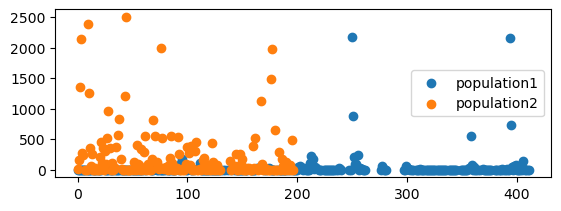

In [28]:
#ttest for RBT
population1 = creel.loc[(creel["Species"] == "RBT") &
                           (creel["County"]== "CHIPPEWA")]
population1 = population1['Catch']


population2 = creel.loc[(creel['Species'] == 'RBT') & (creel['County'] == 'OTTAWA')]
population2= population2['Catch']

plt.subplot(2, 1, 1)
plt.scatter(range(len(population1)), population1, label="population1")
plt.scatter(range(len(population2)), population2, label="population2")
plt.legend()

stats.ttest_ind(Population1, Population2, equal_var=False)

In [33]:
#stats.ttest_ind(population1, population2, equal_var=False)
stats.ttest_ind(population1.dropna(), population2.dropna())

Ttest_indResult(statistic=-6.492958971319742, pvalue=2.0093484348496326e-10)

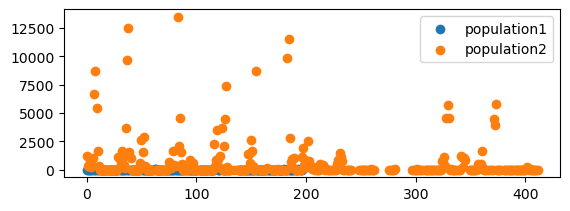

In [34]:
#T Test for Walleye
Population1 = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'OTTAWA')]
Population1 = Population1['Catch']


Population2 = creel.loc[(creel['Species'] == 'WAE') & (creel['County'] == 'CHIPPEWA')]
Population2= Population2['Catch']

plt.subplot(2, 1, 1)
plt.scatter(range(len(Population1)), Population1, label="population1")
plt.scatter(range(len(Population2)), Population2, label="population2")
plt.legend()



In [35]:
stats.ttest_ind(Population1.dropna(), Population2.dropna())

Ttest_indResult(statistic=-4.964646667511315, pvalue=9.417384121123249e-07)

11